In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import lightgbm as lgb

In [3]:
# Scale the input features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [4]:
train=pd.read_csv('merged_train.csv')

In [5]:
train.drop(columns=['patient_id'], inplace=True)

In [6]:
# Define the target variable
target = 'updrs_3' # ['updrs_1','updrs_2','updrs_3','updrs_4',]

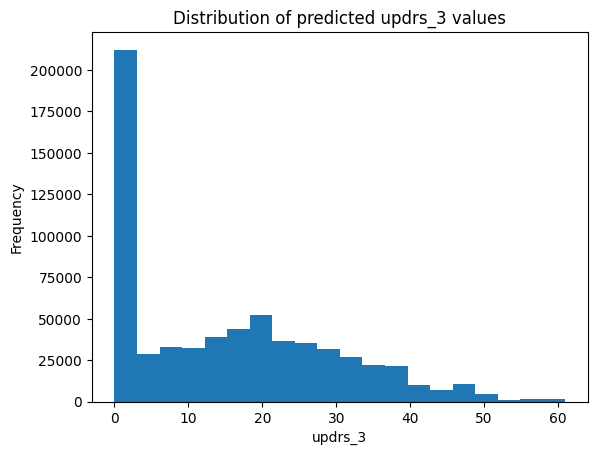

In [7]:
plt.hist(train['updrs_3'], bins=20)
plt.xlabel('updrs_3')
plt.ylabel('Frequency')
plt.title('Distribution of predicted updrs_3 values')
plt.show()

In [8]:
train.drop(columns=['updrs_1','updrs_2','updrs_4',], inplace=True)

In [9]:
train_scaled=scaler.fit_transform(train.drop(target, axis=1))

In [10]:
train_scaled.shape

(651378, 3)

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_scaled, train[target], test_size=0.2, random_state=42)

In [12]:
# Train a LightGBM model
params = {
    'objective': 'regression',
    'metric': 'mae',
    'num_leaves': 30,
    'learning_rate': 0.05,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'seed': 42
}

In [13]:
train_set = lgb.Dataset(X_train, y_train)
val_set = lgb.Dataset(X_test, y_test)

In [14]:
model = lgb.train(params, train_set, num_boost_round=10000, early_stopping_rounds=100, valid_sets=[train_set, val_set])

C:\Users\SAHITHYAMOGILI\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 525
[LightGBM] [Info] Number of data points in the train set: 521102, number of used features: 3
[LightGBM] [Info] Start training from score 15.382589
[1]	training's l1: 11.824	valid_1's l1: 11.8337
Training until validation scores don't improve for 100 rounds
[2]	training's l1: 11.823	valid_1's l1: 11.8327
[3]	training's l1: 11.8221	valid_1's l1: 11.8317
[4]	training's l1: 11.8211	valid_1's l1: 11.8308
[5]	training's l1: 11.8202	valid_1's l1: 11.8299
[6]	training's l1: 11.8195	valid_1's l1: 11.8293
[7]	training's l1: 11.8187	valid_1's l1: 11.8285
[8]	training's l1: 11.7854	valid_1's l1: 11.7948
[9]	training's l1: 11.7847	valid_1's l1: 11.7942
[10]	training's l1: 11.7841	valid_1's l1: 11.7937
[11]	training's l1: 11.7833	valid_1's l1

[171]	training's l1: 11.4141	valid_1's l1: 11.4245
[172]	training's l1: 11.414	valid_1's l1: 11.4245
[173]	training's l1: 11.4139	valid_1's l1: 11.4245
[174]	training's l1: 11.4138	valid_1's l1: 11.4245
[175]	training's l1: 11.4137	valid_1's l1: 11.4245
[176]	training's l1: 11.4128	valid_1's l1: 11.4238
[177]	training's l1: 11.4125	valid_1's l1: 11.4236
[178]	training's l1: 11.4122	valid_1's l1: 11.4234
[179]	training's l1: 11.4119	valid_1's l1: 11.4233
[180]	training's l1: 11.4117	valid_1's l1: 11.4232
[181]	training's l1: 11.4116	valid_1's l1: 11.4231
[182]	training's l1: 11.4115	valid_1's l1: 11.4232
[183]	training's l1: 11.4114	valid_1's l1: 11.4232
[184]	training's l1: 11.4113	valid_1's l1: 11.4232
[185]	training's l1: 11.4113	valid_1's l1: 11.4232
[186]	training's l1: 11.4112	valid_1's l1: 11.4233
[187]	training's l1: 11.4111	valid_1's l1: 11.4233
[188]	training's l1: 11.4103	valid_1's l1: 11.4226
[189]	training's l1: 11.4102	valid_1's l1: 11.4226
[190]	training's l1: 11.4101	val

[356]	training's l1: 11.3658	valid_1's l1: 11.3921
[357]	training's l1: 11.3657	valid_1's l1: 11.3921
[358]	training's l1: 11.3656	valid_1's l1: 11.3921
[359]	training's l1: 11.3656	valid_1's l1: 11.3922
[360]	training's l1: 11.3654	valid_1's l1: 11.3922
[361]	training's l1: 11.3647	valid_1's l1: 11.3916
[362]	training's l1: 11.3646	valid_1's l1: 11.3916
[363]	training's l1: 11.3645	valid_1's l1: 11.3915
[364]	training's l1: 11.3639	valid_1's l1: 11.391
[365]	training's l1: 11.3638	valid_1's l1: 11.391
[366]	training's l1: 11.3637	valid_1's l1: 11.391
[367]	training's l1: 11.3636	valid_1's l1: 11.3909
[368]	training's l1: 11.3635	valid_1's l1: 11.3909
[369]	training's l1: 11.3634	valid_1's l1: 11.3909
[370]	training's l1: 11.3628	valid_1's l1: 11.3905
[371]	training's l1: 11.3623	valid_1's l1: 11.3901
[372]	training's l1: 11.3622	valid_1's l1: 11.3901
[373]	training's l1: 11.362	valid_1's l1: 11.39
[374]	training's l1: 11.3618	valid_1's l1: 11.39
[375]	training's l1: 11.3617	valid_1's 

[540]	training's l1: 11.3329	valid_1's l1: 11.3748
[541]	training's l1: 11.3328	valid_1's l1: 11.3748
[542]	training's l1: 11.3327	valid_1's l1: 11.3748
[543]	training's l1: 11.3324	valid_1's l1: 11.3745
[544]	training's l1: 11.3323	valid_1's l1: 11.3746
[545]	training's l1: 11.3323	valid_1's l1: 11.3746
[546]	training's l1: 11.3321	valid_1's l1: 11.3746
[547]	training's l1: 11.332	valid_1's l1: 11.3745
[548]	training's l1: 11.3319	valid_1's l1: 11.3745
[549]	training's l1: 11.3318	valid_1's l1: 11.3745
[550]	training's l1: 11.3317	valid_1's l1: 11.3745
[551]	training's l1: 11.3317	valid_1's l1: 11.3745
[552]	training's l1: 11.3315	valid_1's l1: 11.3744
[553]	training's l1: 11.3314	valid_1's l1: 11.3744
[554]	training's l1: 11.3313	valid_1's l1: 11.3744
[555]	training's l1: 11.3313	valid_1's l1: 11.3744
[556]	training's l1: 11.3312	valid_1's l1: 11.3744
[557]	training's l1: 11.331	valid_1's l1: 11.3744
[558]	training's l1: 11.3309	valid_1's l1: 11.3744
[559]	training's l1: 11.3308	vali

[725]	training's l1: 11.3072	valid_1's l1: 11.3636
[726]	training's l1: 11.3068	valid_1's l1: 11.3633
[727]	training's l1: 11.3067	valid_1's l1: 11.3632
[728]	training's l1: 11.3066	valid_1's l1: 11.3632
[729]	training's l1: 11.3065	valid_1's l1: 11.3631
[730]	training's l1: 11.3064	valid_1's l1: 11.3631
[731]	training's l1: 11.3062	valid_1's l1: 11.3631
[732]	training's l1: 11.3059	valid_1's l1: 11.3628
[733]	training's l1: 11.3058	valid_1's l1: 11.3627
[734]	training's l1: 11.3057	valid_1's l1: 11.3628
[735]	training's l1: 11.3056	valid_1's l1: 11.3628
[736]	training's l1: 11.3055	valid_1's l1: 11.3627
[737]	training's l1: 11.3051	valid_1's l1: 11.3624
[738]	training's l1: 11.305	valid_1's l1: 11.3624
[739]	training's l1: 11.3048	valid_1's l1: 11.3623
[740]	training's l1: 11.3045	valid_1's l1: 11.362
[741]	training's l1: 11.3044	valid_1's l1: 11.3619
[742]	training's l1: 11.304	valid_1's l1: 11.3616
[743]	training's l1: 11.3038	valid_1's l1: 11.3614
[744]	training's l1: 11.3036	valid

[895]	training's l1: 11.283	valid_1's l1: 11.3504
[896]	training's l1: 11.2828	valid_1's l1: 11.3503
[897]	training's l1: 11.2828	valid_1's l1: 11.3504
[898]	training's l1: 11.2828	valid_1's l1: 11.3504
[899]	training's l1: 11.2829	valid_1's l1: 11.3505
[900]	training's l1: 11.2828	valid_1's l1: 11.3504
[901]	training's l1: 11.2827	valid_1's l1: 11.3504
[902]	training's l1: 11.2826	valid_1's l1: 11.3503
[903]	training's l1: 11.2824	valid_1's l1: 11.3502
[904]	training's l1: 11.2824	valid_1's l1: 11.3502
[905]	training's l1: 11.2823	valid_1's l1: 11.3502
[906]	training's l1: 11.2822	valid_1's l1: 11.3502
[907]	training's l1: 11.2821	valid_1's l1: 11.3502
[908]	training's l1: 11.282	valid_1's l1: 11.3501
[909]	training's l1: 11.282	valid_1's l1: 11.3501
[910]	training's l1: 11.2819	valid_1's l1: 11.3501
[911]	training's l1: 11.2818	valid_1's l1: 11.35
[912]	training's l1: 11.2817	valid_1's l1: 11.3499
[913]	training's l1: 11.2814	valid_1's l1: 11.3497
[914]	training's l1: 11.2812	valid_1

[1066]	training's l1: 11.2641	valid_1's l1: 11.3428
[1067]	training's l1: 11.264	valid_1's l1: 11.3428
[1068]	training's l1: 11.2637	valid_1's l1: 11.3425
[1069]	training's l1: 11.2636	valid_1's l1: 11.3425
[1070]	training's l1: 11.2635	valid_1's l1: 11.3426
[1071]	training's l1: 11.2635	valid_1's l1: 11.3426
[1072]	training's l1: 11.2634	valid_1's l1: 11.3426
[1073]	training's l1: 11.2634	valid_1's l1: 11.3426
[1074]	training's l1: 11.2633	valid_1's l1: 11.3426
[1075]	training's l1: 11.2632	valid_1's l1: 11.3425
[1076]	training's l1: 11.2631	valid_1's l1: 11.3425
[1077]	training's l1: 11.263	valid_1's l1: 11.3425
[1078]	training's l1: 11.2628	valid_1's l1: 11.3425
[1079]	training's l1: 11.2628	valid_1's l1: 11.3424
[1080]	training's l1: 11.2626	valid_1's l1: 11.3423
[1081]	training's l1: 11.2625	valid_1's l1: 11.3423
[1082]	training's l1: 11.2623	valid_1's l1: 11.3421
[1083]	training's l1: 11.2622	valid_1's l1: 11.3421
[1084]	training's l1: 11.2621	valid_1's l1: 11.3421
[1085]	trainin

[1230]	training's l1: 11.2469	valid_1's l1: 11.3353
[1231]	training's l1: 11.2469	valid_1's l1: 11.3353
[1232]	training's l1: 11.2468	valid_1's l1: 11.3353
[1233]	training's l1: 11.2468	valid_1's l1: 11.3353
[1234]	training's l1: 11.2467	valid_1's l1: 11.3354
[1235]	training's l1: 11.2466	valid_1's l1: 11.3353
[1236]	training's l1: 11.2465	valid_1's l1: 11.3353
[1237]	training's l1: 11.2464	valid_1's l1: 11.3352
[1238]	training's l1: 11.2462	valid_1's l1: 11.3351
[1239]	training's l1: 11.246	valid_1's l1: 11.3349
[1240]	training's l1: 11.2459	valid_1's l1: 11.3349
[1241]	training's l1: 11.2458	valid_1's l1: 11.3349
[1242]	training's l1: 11.2457	valid_1's l1: 11.3348
[1243]	training's l1: 11.2456	valid_1's l1: 11.3348
[1244]	training's l1: 11.2455	valid_1's l1: 11.3348
[1245]	training's l1: 11.2454	valid_1's l1: 11.3347
[1246]	training's l1: 11.2453	valid_1's l1: 11.3347
[1247]	training's l1: 11.245	valid_1's l1: 11.3345
[1248]	training's l1: 11.2449	valid_1's l1: 11.3345
[1249]	trainin

[1412]	training's l1: 11.2294	valid_1's l1: 11.3289
[1413]	training's l1: 11.2293	valid_1's l1: 11.329
[1414]	training's l1: 11.2292	valid_1's l1: 11.329
[1415]	training's l1: 11.2292	valid_1's l1: 11.3291
[1416]	training's l1: 11.2291	valid_1's l1: 11.3291
[1417]	training's l1: 11.2289	valid_1's l1: 11.3291
[1418]	training's l1: 11.2288	valid_1's l1: 11.3291
[1419]	training's l1: 11.2287	valid_1's l1: 11.329
[1420]	training's l1: 11.2286	valid_1's l1: 11.3289
[1421]	training's l1: 11.2285	valid_1's l1: 11.329
[1422]	training's l1: 11.2285	valid_1's l1: 11.329
[1423]	training's l1: 11.2284	valid_1's l1: 11.3289
[1424]	training's l1: 11.2283	valid_1's l1: 11.329
[1425]	training's l1: 11.2283	valid_1's l1: 11.329
[1426]	training's l1: 11.2282	valid_1's l1: 11.3289
[1427]	training's l1: 11.2281	valid_1's l1: 11.3289
[1428]	training's l1: 11.2281	valid_1's l1: 11.3289
[1429]	training's l1: 11.228	valid_1's l1: 11.3289
[1430]	training's l1: 11.2279	valid_1's l1: 11.3289
[1431]	training's l1

[1596]	training's l1: 11.213	valid_1's l1: 11.3225
[1597]	training's l1: 11.2129	valid_1's l1: 11.3225
[1598]	training's l1: 11.2127	valid_1's l1: 11.3222
[1599]	training's l1: 11.2127	valid_1's l1: 11.3223
[1600]	training's l1: 11.2124	valid_1's l1: 11.322
[1601]	training's l1: 11.2123	valid_1's l1: 11.3219
[1602]	training's l1: 11.2122	valid_1's l1: 11.3219
[1603]	training's l1: 11.2121	valid_1's l1: 11.3219
[1604]	training's l1: 11.2121	valid_1's l1: 11.3219
[1605]	training's l1: 11.212	valid_1's l1: 11.3219
[1606]	training's l1: 11.2119	valid_1's l1: 11.322
[1607]	training's l1: 11.2119	valid_1's l1: 11.322
[1608]	training's l1: 11.2115	valid_1's l1: 11.3217
[1609]	training's l1: 11.2115	valid_1's l1: 11.3217
[1610]	training's l1: 11.2113	valid_1's l1: 11.3215
[1611]	training's l1: 11.2112	valid_1's l1: 11.3215
[1612]	training's l1: 11.211	valid_1's l1: 11.3213
[1613]	training's l1: 11.2109	valid_1's l1: 11.3213
[1614]	training's l1: 11.2107	valid_1's l1: 11.3212
[1615]	training's 

[1771]	training's l1: 11.1973	valid_1's l1: 11.3174
[1772]	training's l1: 11.1973	valid_1's l1: 11.3174
[1773]	training's l1: 11.1972	valid_1's l1: 11.3174
[1774]	training's l1: 11.1972	valid_1's l1: 11.3174
[1775]	training's l1: 11.1972	valid_1's l1: 11.3175
[1776]	training's l1: 11.1971	valid_1's l1: 11.3174
[1777]	training's l1: 11.197	valid_1's l1: 11.3173
[1778]	training's l1: 11.1969	valid_1's l1: 11.3173
[1779]	training's l1: 11.1968	valid_1's l1: 11.3172
[1780]	training's l1: 11.1967	valid_1's l1: 11.3172
[1781]	training's l1: 11.1967	valid_1's l1: 11.3172
[1782]	training's l1: 11.1966	valid_1's l1: 11.3173
[1783]	training's l1: 11.1966	valid_1's l1: 11.3173
[1784]	training's l1: 11.1964	valid_1's l1: 11.3171
[1785]	training's l1: 11.1964	valid_1's l1: 11.3171
[1786]	training's l1: 11.1963	valid_1's l1: 11.317
[1787]	training's l1: 11.1961	valid_1's l1: 11.317
[1788]	training's l1: 11.1959	valid_1's l1: 11.3167
[1789]	training's l1: 11.1958	valid_1's l1: 11.3167
[1790]	training

[1952]	training's l1: 11.1824	valid_1's l1: 11.3128
[1953]	training's l1: 11.1824	valid_1's l1: 11.3129
[1954]	training's l1: 11.1824	valid_1's l1: 11.3129
[1955]	training's l1: 11.1824	valid_1's l1: 11.313
[1956]	training's l1: 11.1823	valid_1's l1: 11.313
[1957]	training's l1: 11.1823	valid_1's l1: 11.313
[1958]	training's l1: 11.1822	valid_1's l1: 11.313
[1959]	training's l1: 11.1822	valid_1's l1: 11.3131
[1960]	training's l1: 11.1821	valid_1's l1: 11.3131
[1961]	training's l1: 11.182	valid_1's l1: 11.3131
[1962]	training's l1: 11.182	valid_1's l1: 11.313
[1963]	training's l1: 11.1819	valid_1's l1: 11.313
[1964]	training's l1: 11.1819	valid_1's l1: 11.3131
[1965]	training's l1: 11.1818	valid_1's l1: 11.313
[1966]	training's l1: 11.1817	valid_1's l1: 11.313
[1967]	training's l1: 11.1817	valid_1's l1: 11.3131
[1968]	training's l1: 11.1816	valid_1's l1: 11.3131
[1969]	training's l1: 11.1816	valid_1's l1: 11.3132
[1970]	training's l1: 11.1816	valid_1's l1: 11.3132
[1971]	training's l1: 

[2115]	training's l1: 11.1708	valid_1's l1: 11.3094
[2116]	training's l1: 11.1708	valid_1's l1: 11.3094
[2117]	training's l1: 11.1708	valid_1's l1: 11.3094
[2118]	training's l1: 11.1707	valid_1's l1: 11.3095
[2119]	training's l1: 11.1707	valid_1's l1: 11.3095
[2120]	training's l1: 11.1707	valid_1's l1: 11.3095
[2121]	training's l1: 11.1706	valid_1's l1: 11.3095
[2122]	training's l1: 11.1705	valid_1's l1: 11.3095
[2123]	training's l1: 11.1705	valid_1's l1: 11.3095
[2124]	training's l1: 11.1704	valid_1's l1: 11.3094
[2125]	training's l1: 11.1703	valid_1's l1: 11.3094
[2126]	training's l1: 11.1703	valid_1's l1: 11.3094
[2127]	training's l1: 11.1703	valid_1's l1: 11.3095
[2128]	training's l1: 11.1703	valid_1's l1: 11.3094
[2129]	training's l1: 11.1703	valid_1's l1: 11.3093
[2130]	training's l1: 11.1702	valid_1's l1: 11.3094
[2131]	training's l1: 11.1702	valid_1's l1: 11.3094
[2132]	training's l1: 11.1701	valid_1's l1: 11.3095
[2133]	training's l1: 11.1701	valid_1's l1: 11.3095
[2134]	train

[2278]	training's l1: 11.1597	valid_1's l1: 11.3065
[2279]	training's l1: 11.1596	valid_1's l1: 11.3065
[2280]	training's l1: 11.1596	valid_1's l1: 11.3065
[2281]	training's l1: 11.1595	valid_1's l1: 11.3065
[2282]	training's l1: 11.1595	valid_1's l1: 11.3065
[2283]	training's l1: 11.1595	valid_1's l1: 11.3065
[2284]	training's l1: 11.1595	valid_1's l1: 11.3065
[2285]	training's l1: 11.1594	valid_1's l1: 11.3065
[2286]	training's l1: 11.1594	valid_1's l1: 11.3065
[2287]	training's l1: 11.1594	valid_1's l1: 11.3065
[2288]	training's l1: 11.1593	valid_1's l1: 11.3065
[2289]	training's l1: 11.1593	valid_1's l1: 11.3065
[2290]	training's l1: 11.1592	valid_1's l1: 11.3065
[2291]	training's l1: 11.1591	valid_1's l1: 11.3065
[2292]	training's l1: 11.159	valid_1's l1: 11.3064
[2293]	training's l1: 11.159	valid_1's l1: 11.3064
[2294]	training's l1: 11.1589	valid_1's l1: 11.3064
[2295]	training's l1: 11.1588	valid_1's l1: 11.3064
[2296]	training's l1: 11.1588	valid_1's l1: 11.3064
[2297]	trainin

[2448]	training's l1: 11.1488	valid_1's l1: 11.3028
[2449]	training's l1: 11.1488	valid_1's l1: 11.3028
[2450]	training's l1: 11.1487	valid_1's l1: 11.3028
[2451]	training's l1: 11.1487	valid_1's l1: 11.3028
[2452]	training's l1: 11.1487	valid_1's l1: 11.3028
[2453]	training's l1: 11.1486	valid_1's l1: 11.3028
[2454]	training's l1: 11.1486	valid_1's l1: 11.3028
[2455]	training's l1: 11.1486	valid_1's l1: 11.3029
[2456]	training's l1: 11.1484	valid_1's l1: 11.3028
[2457]	training's l1: 11.1483	valid_1's l1: 11.3027
[2458]	training's l1: 11.1482	valid_1's l1: 11.3027
[2459]	training's l1: 11.1481	valid_1's l1: 11.3026
[2460]	training's l1: 11.148	valid_1's l1: 11.3026
[2461]	training's l1: 11.148	valid_1's l1: 11.3027
[2462]	training's l1: 11.1479	valid_1's l1: 11.3027
[2463]	training's l1: 11.1479	valid_1's l1: 11.3028
[2464]	training's l1: 11.1479	valid_1's l1: 11.3028
[2465]	training's l1: 11.1478	valid_1's l1: 11.3029
[2466]	training's l1: 11.1478	valid_1's l1: 11.3029
[2467]	trainin

[2616]	training's l1: 11.139	valid_1's l1: 11.3005
[2617]	training's l1: 11.139	valid_1's l1: 11.3005
[2618]	training's l1: 11.139	valid_1's l1: 11.3004
[2619]	training's l1: 11.139	valid_1's l1: 11.3004
[2620]	training's l1: 11.139	valid_1's l1: 11.3004
[2621]	training's l1: 11.139	valid_1's l1: 11.3004
[2622]	training's l1: 11.1389	valid_1's l1: 11.3004
[2623]	training's l1: 11.1388	valid_1's l1: 11.3004
[2624]	training's l1: 11.1388	valid_1's l1: 11.3005
[2625]	training's l1: 11.1388	valid_1's l1: 11.3005
[2626]	training's l1: 11.1388	valid_1's l1: 11.3005
[2627]	training's l1: 11.1387	valid_1's l1: 11.3006
[2628]	training's l1: 11.1387	valid_1's l1: 11.3006
[2629]	training's l1: 11.1387	valid_1's l1: 11.3007
[2630]	training's l1: 11.1387	valid_1's l1: 11.3007
[2631]	training's l1: 11.1387	valid_1's l1: 11.3007
[2632]	training's l1: 11.1386	valid_1's l1: 11.3006
[2633]	training's l1: 11.1386	valid_1's l1: 11.3007
[2634]	training's l1: 11.1385	valid_1's l1: 11.3007
[2635]	training's 

[2780]	training's l1: 11.1292	valid_1's l1: 11.2972
[2781]	training's l1: 11.1293	valid_1's l1: 11.2973
[2782]	training's l1: 11.1293	valid_1's l1: 11.2974
[2783]	training's l1: 11.1293	valid_1's l1: 11.2974
[2784]	training's l1: 11.1293	valid_1's l1: 11.2975
[2785]	training's l1: 11.1293	valid_1's l1: 11.2976
[2786]	training's l1: 11.1293	valid_1's l1: 11.2976
[2787]	training's l1: 11.1293	valid_1's l1: 11.2977
[2788]	training's l1: 11.1292	valid_1's l1: 11.2977
[2789]	training's l1: 11.1292	valid_1's l1: 11.2977
[2790]	training's l1: 11.1292	valid_1's l1: 11.2977
[2791]	training's l1: 11.1291	valid_1's l1: 11.2976
[2792]	training's l1: 11.129	valid_1's l1: 11.2975
[2793]	training's l1: 11.1289	valid_1's l1: 11.2974
[2794]	training's l1: 11.1288	valid_1's l1: 11.2974
[2795]	training's l1: 11.1287	valid_1's l1: 11.2974
[2796]	training's l1: 11.1287	valid_1's l1: 11.2974
[2797]	training's l1: 11.1286	valid_1's l1: 11.2974
[2798]	training's l1: 11.1286	valid_1's l1: 11.2974
[2799]	traini

[2944]	training's l1: 11.1206	valid_1's l1: 11.2959
[2945]	training's l1: 11.1206	valid_1's l1: 11.2959
[2946]	training's l1: 11.1206	valid_1's l1: 11.2959
[2947]	training's l1: 11.1205	valid_1's l1: 11.2958
[2948]	training's l1: 11.1205	valid_1's l1: 11.2958
[2949]	training's l1: 11.1204	valid_1's l1: 11.2958
[2950]	training's l1: 11.1204	valid_1's l1: 11.2958
[2951]	training's l1: 11.1203	valid_1's l1: 11.2957
[2952]	training's l1: 11.1203	valid_1's l1: 11.2958
[2953]	training's l1: 11.1202	valid_1's l1: 11.2957
[2954]	training's l1: 11.1202	valid_1's l1: 11.2958
[2955]	training's l1: 11.1202	valid_1's l1: 11.2959
[2956]	training's l1: 11.1201	valid_1's l1: 11.2958
[2957]	training's l1: 11.1199	valid_1's l1: 11.2957
[2958]	training's l1: 11.1198	valid_1's l1: 11.2956
[2959]	training's l1: 11.1197	valid_1's l1: 11.2955
[2960]	training's l1: 11.1196	valid_1's l1: 11.2954
[2961]	training's l1: 11.1195	valid_1's l1: 11.2954
[2962]	training's l1: 11.1194	valid_1's l1: 11.2953
[2963]	train

[3115]	training's l1: 11.1115	valid_1's l1: 11.2933
[3116]	training's l1: 11.1115	valid_1's l1: 11.2933
[3117]	training's l1: 11.1114	valid_1's l1: 11.2933
[3118]	training's l1: 11.1114	valid_1's l1: 11.2934
[3119]	training's l1: 11.1114	valid_1's l1: 11.2934
[3120]	training's l1: 11.1114	valid_1's l1: 11.2934
[3121]	training's l1: 11.1112	valid_1's l1: 11.2933
[3122]	training's l1: 11.1111	valid_1's l1: 11.2932
[3123]	training's l1: 11.1111	valid_1's l1: 11.2932
[3124]	training's l1: 11.1109	valid_1's l1: 11.2931
[3125]	training's l1: 11.1109	valid_1's l1: 11.2931
[3126]	training's l1: 11.1107	valid_1's l1: 11.2931
[3127]	training's l1: 11.1106	valid_1's l1: 11.293
[3128]	training's l1: 11.1105	valid_1's l1: 11.293
[3129]	training's l1: 11.1104	valid_1's l1: 11.293
[3130]	training's l1: 11.1102	valid_1's l1: 11.293
[3131]	training's l1: 11.1102	valid_1's l1: 11.2929
[3132]	training's l1: 11.1102	valid_1's l1: 11.293
[3133]	training's l1: 11.1102	valid_1's l1: 11.293
[3134]	training's 

In [15]:
y_pred = model.predict(X_test)
print(y_pred)

[15.77905997 16.27828014 14.21441732 ... 15.90632991 14.35952042
 11.12977437]


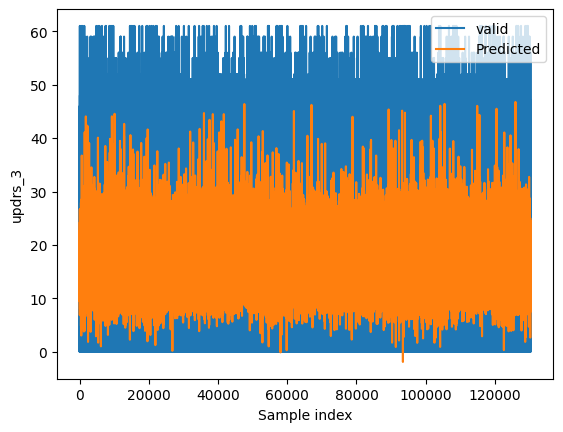

In [16]:
# Plot actual vs predicted values
plt.plot(y_test.values, label='valid')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample index')
plt.ylabel('updrs_3')
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)
r2 = r2_score(y_test, y_pred)
print('R^2 score:', r2)


MAE: 11.292715996251442
RMSE: 13.408954845537801
R^2 score: 0.07195775172022645


In [18]:
test=pd.read_csv('merged_test.csv')

In [19]:
test.drop(columns=['patient_id'] , inplace = True)

In [20]:
test_scaled=scaler.fit_transform(test)

In [21]:
y_test_pred=model.predict(test_scaled)

In [22]:
y_test_pred

array([13.66989957, 13.66989957, 15.81802928, ..., 29.93148725,
       29.93148725, 29.93148725])

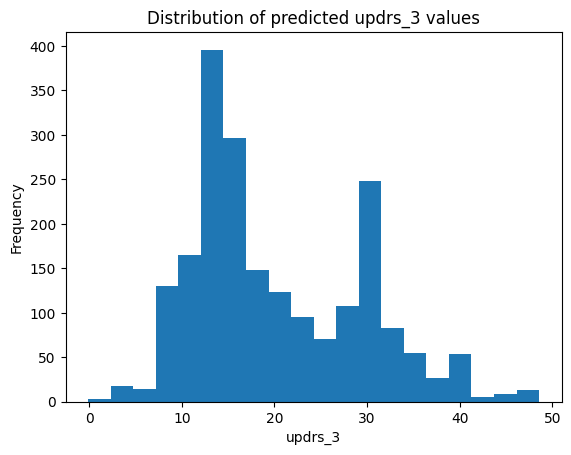

In [23]:
plt.hist(y_test_pred, bins=20)
plt.xlabel('updrs_3')
plt.ylabel('Frequency')
plt.title('Distribution of predicted updrs_3 values')
plt.show()